In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
url = "https://raw.githubusercontent.com/SanjeevMakesh24/ml_assignment1/main/day.csv"

In [ ]:
df = pd.read_csv(url)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
df.shape

(731, 16)

In [ ]:
#we don't need instant or the date
df = df.drop(['instant', 'dteday'], axis=1)

In [ ]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      731 non-null    int64  
 1   yr          731 non-null    int64  
 2   mnth        731 non-null    int64  
 3   holiday     731 non-null    int64  
 4   weekday     731 non-null    int64  
 5   workingday  731 non-null    int64  
 6   weathersit  731 non-null    int64  
 7   temp        731 non-null    float64
 8   atemp       731 non-null    float64
 9   hum         731 non-null    float64
 10  windspeed   731 non-null    float64
 11  casual      731 non-null    int64  
 12  registered  731 non-null    int64  
 13  cnt         731 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 80.1 KB


In [ ]:
#dropping null values
df = df.dropna()

In [ ]:
#convert categorical variables to numerical using one-hot encoding
categorical_cols = ['season', 'weathersit', 'weekday']
df = pd.get_dummies(df, columns=categorical_cols)

In [ ]:
print(df.shape) #25 rows

(731, 25)


In [ ]:
#checking which features might be most useful for building a model to predict bike count
correlation_matrix = df.corr().round(2)['cnt'].sort_values(ascending=False)

In [ ]:
correlation_matrix

,cnt
cnt,1.00
registered,0.95
casual,0.67
atemp,0.63
temp,0.63
yr,0.57
season_3,0.35
mnth,0.28
weathersit_1,0.25
season_2,0.15


In [ ]:
#based on the correlation matrix we drop the following columns
df = df.drop(['casual', 'registered', 'atemp', 'weekday_0', 'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6'], axis = 1)
print(df.shape)
print(df.columns) #registered and casual add up to cnt

(731, 15)
Index(['yr', 'mnth', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'cnt', 'season_1', 'season_2', 'season_3', 'season_4', 'weathersit_1',
       'weathersit_2', 'weathersit_3'],
      dtype='object')


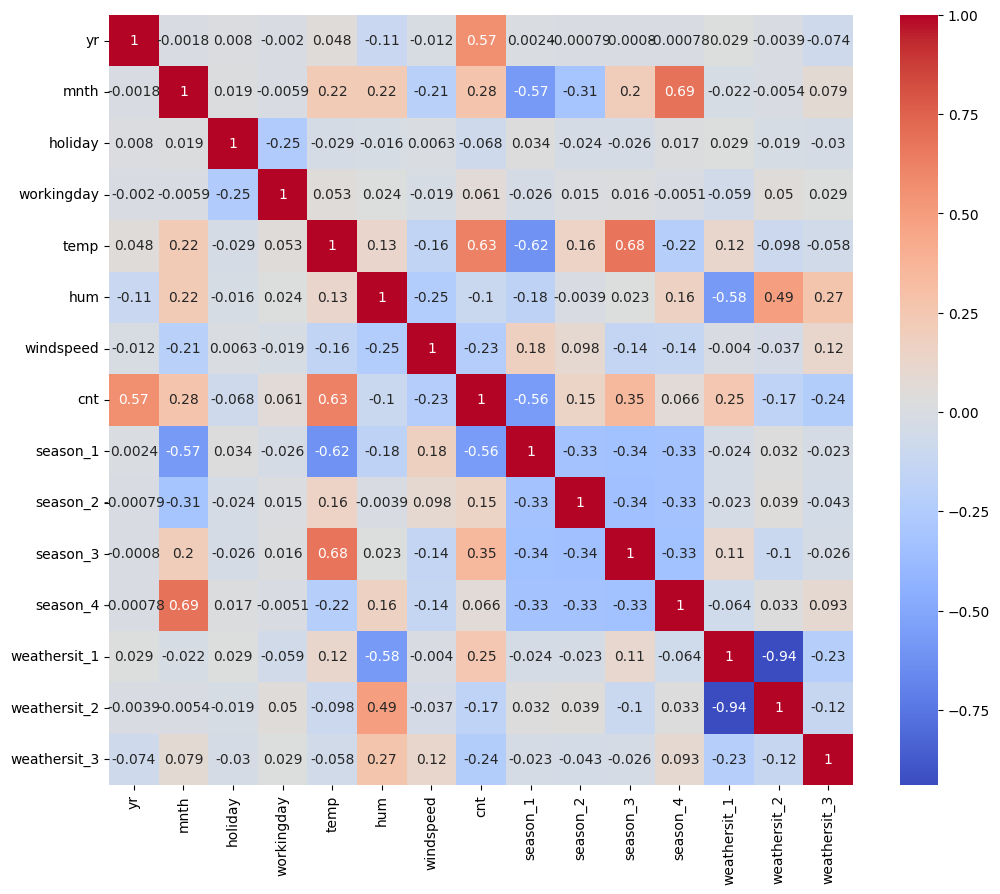

In [ ]:
#heatmap for correlation matrix (follow the cnt column)
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

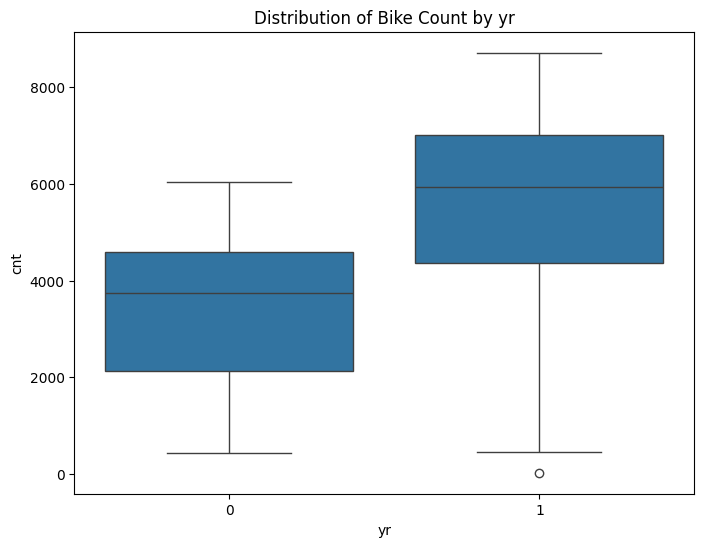

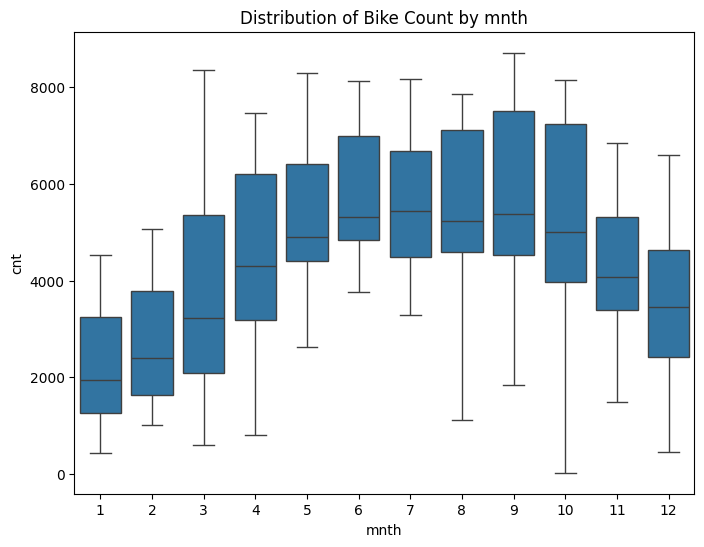

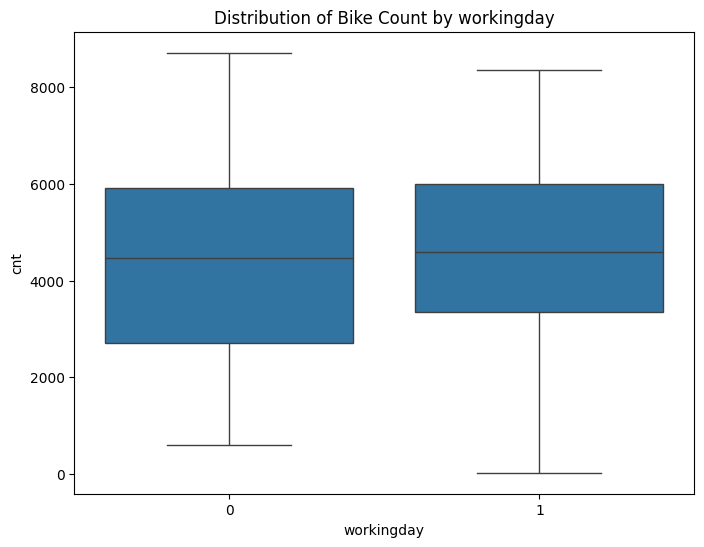

In [ ]:
categorical_vars = ['yr', 'mnth', 'workingday']

for var in categorical_vars:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=var, y='cnt', data=df)
    plt.title(f'Distribution of Bike Count by {var}')
    plt.show()

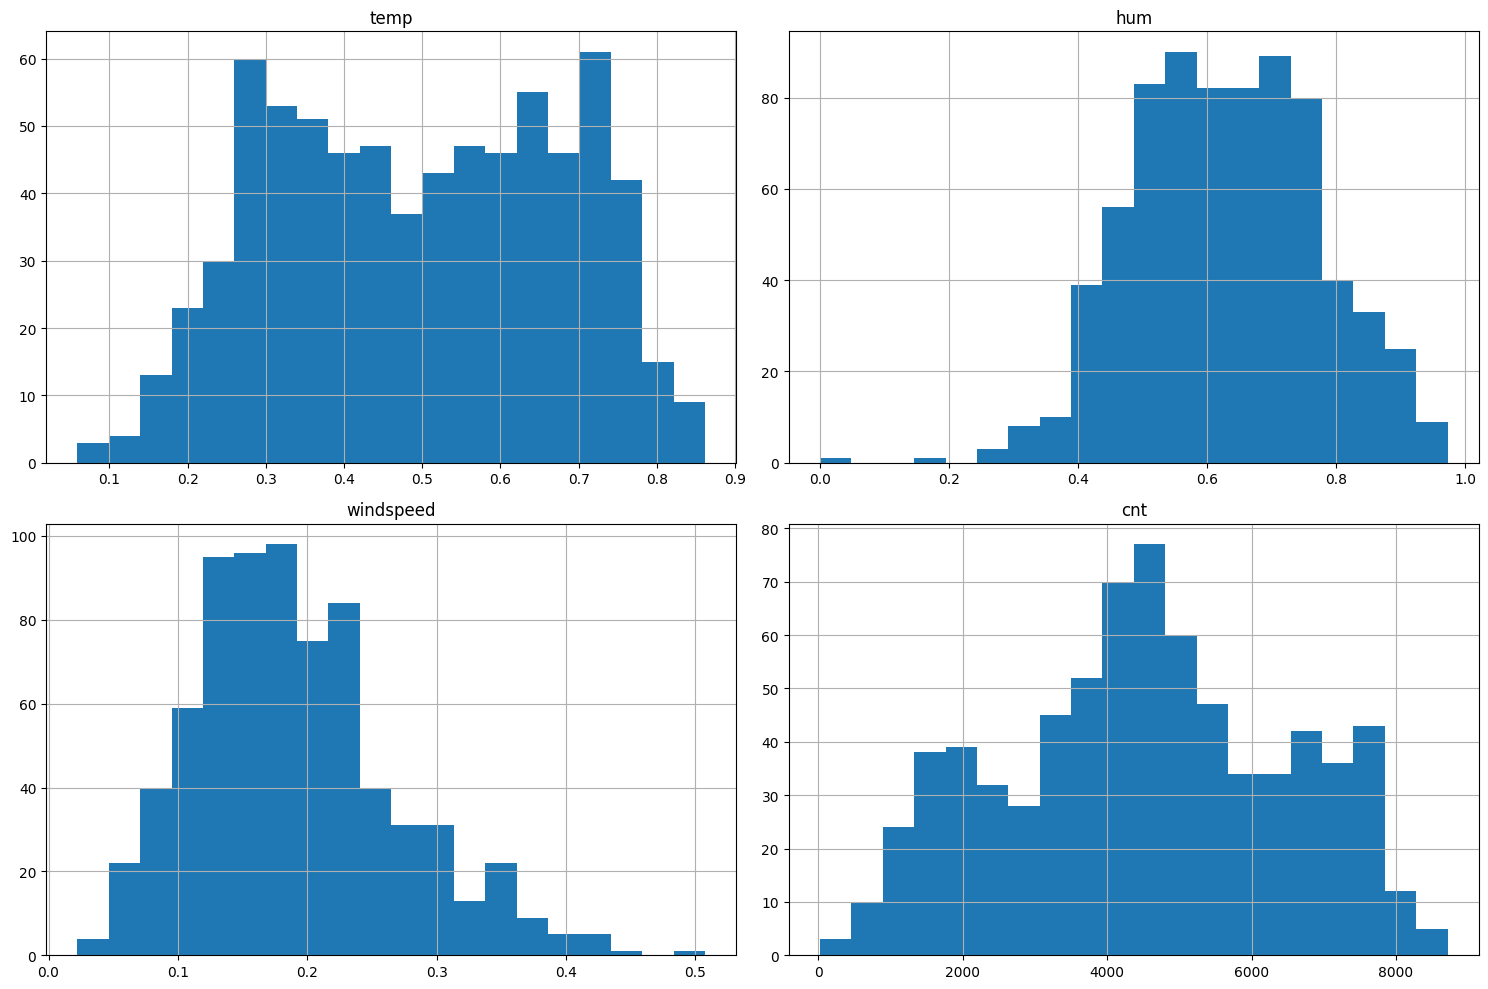

In [ ]:
#distribution of these variables (they are already normalized)
numerical_cols = ['temp', 'hum', 'windspeed', 'cnt'] #cnt isnt really required
df[numerical_cols].hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import SGDRegressor

In [ ]:
#train test split
X = df.drop('cnt', axis=1)
y = df['cnt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape

((584, 14), (147, 14))

In [ ]:
#hyperparameters to test
param_grid = {
    "loss": ["squared_error", "huber", "epsilon_insensitive", "squared_epsilon_insensitive"],
    "penalty": ["l2", "l1", "elasticnet"],
    "alpha": [1e-5, 1e-4, 1e-3, 1e-2],
    "max_iter": [1000, 2000, 3000, 5000],
    "tol": [1e-3, 1e-4, 1e-5],
    "learning_rate": ["optimal", "invscaling", "constant"],
    "eta0": [0.01, 0.05]
}

In [ ]:
sgd = SGDRegressor()

In [ ]:
gs = GridSearchCV(
    estimator=sgd,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring="neg_root_mean_squared_error",
    verbose=0
)

In [ ]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SGDRegressor(), n_jobs=-1,
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01],
                         'eta0': [0.01, 0.05],
                         'learning_rate': ['optimal', 'invscaling', 'constant'],
                         'loss': ['squared_error', 'huber',
                                  'epsilon_insensitive',
                                  'squared_epsilon_insensitive'],
                         'max_iter': [1000, 2000, 3000, 5000],
                         'penalty': ['l2', 'l1', 'elasticnet'],
                         'tol': [0.001, 0.0001, 1e-05]},
             scoring='neg_root_mean_squared_error')

In [ ]:
best = gs.best_estimator_
y_pred = best.predict(X_test)

In [ ]:
y_pred

array([6494.74048364, 1582.56060225, 3375.19495109, 5296.97544529,
       6735.10882581, 7000.16536131,  838.63177402, 1996.65913369,
       6469.28874914, 6917.65167271, 3464.96405324, 1663.85472291,
       4541.4051641 , 5953.44429922, 2006.87010744, 1892.7604545 ,
       2088.52936208, 7008.36848299, 5041.3084849 , 3105.71090979,
       6924.81811502, 7378.99484071, 5957.08375408, 1742.40426513,
       1269.63620118, 4749.17249851, 3143.91462207, 6699.37186684,
       3904.71595098, 6267.70618938, 3606.89187899, 4042.7798513 ,
       6326.49285353, 6644.88802402, 6140.44503252, 5511.71312542,
       6359.81175557, 5932.22681256, 3607.16461894,  987.12697253,
       4550.0286104 , 3875.66269123, 6992.30207859, 3944.97927788,
       7080.49721267, 2024.54070958, 5010.4691979 , 4507.86606746,
       6398.85522201, 5292.43834431, 3545.53751335, 3577.81460038,
       1682.770666  , 5068.73367005, 4848.1937506 , 4070.74444392,
       4315.1750386 , 3367.01665778, 4589.68633416, 6449.29444

In [ ]:
print("Best parameters:", gs.best_params_)

Best parameters: {'alpha': 1e-05, 'eta0': 0.05, 'learning_rate': 'invscaling', 'loss': 'squared_error', 'max_iter': 3000, 'penalty': 'l1', 'tol': 1e-05}


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
print("Test RMSE:", mean_squared_error(y_test, y_pred) ** 0.5)
print("Test R-Sqaured:", r2_score(y_test, y_pred))

Test RMSE: 867.5256012346504
Test R-Sqaured: 0.8123135257759881


In [ ]:
y_train_pred = best.predict(X_train)

print("Train RMSE:", mean_squared_error(y_train, y_train_pred) ** 0.5)
print("Train R-Sqaured:", r2_score(y_train, y_train_pred))

Train RMSE: 861.9102393666212
Train R-Sqaured: 0.7973404951925637


In [ ]:
#baseline comparison
baseline_mse = np.mean((y_test - np.mean(y_train)) ** 2)
baseline_rmse = np.sqrt(baseline_mse)
test_mse = mean_squared_error(y_test, y_pred) ** 0.5
improvement = (baseline_mse - test_mse) / baseline_mse * 100

In [ ]:
print("Baseline RMSE:", baseline_rmse)
print("Test RMSE:", test_mse)
print("Improvement over Baseline:", improvement)

Baseline RMSE: 2022.1728092627525
Test RMSE: 867.5256012346504
Improvement over Baseline: 99.97878486659306


In [ ]:
#Implementing Ordinary Linear Regression using the statsmodels library.
import statsmodels.api as sm

In [ ]:
X = df.drop('cnt', axis=1) #store features in x
y = df['cnt'] #store target in y

In [ ]:
X.head()

,yr,mnth,holiday,workingday,temp,hum,windspeed,season_1,season_2,season_3,season_4,weathersit_1,weathersit_2,weathersit_3
0,0,1,0,0,0.344167,0.805833,0.160446,True,False,False,False,False,True,False
1,0,1,0,0,0.363478,0.696087,0.248539,True,False,False,False,False,True,False
2,0,1,0,1,0.196364,0.437273,0.248309,True,False,False,False,True,False,False
3,0,1,0,1,0.200000,0.590435,0.160296,True,False,False,False,True,False,False
4,0,1,0,1,0.226957,0.436957,0.186900,True,False,False,False,True,False,False


In [ ]:
y.head()

,cnt
0,985
1,801
2,1349
3,1562
4,1600


In [ ]:
X = sm.add_constant(X) #need to add a constant to include a intercept in regression model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42) #split into training and test set

In [ ]:
#One hot encoding produced bool vals which cause issues with statsmodels so converting them to integer in order to train model
X_train = X_train.astype(X_train.dtypes.replace('bool', 'int'))

In [ ]:
#train the OLS model
mod = sm.OLS(y_train, X_train)
res = mod.fit()

In [ ]:
print(res.summary()) #output model diagnostics

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     212.1
Date:                Mon, 22 Sep 2025   Prob (F-statistic):          2.49e-201
Time:                        19:23:10   Log-Likelihood:                -4746.6
No. Observations:                 584   AIC:                             9519.
Df Residuals:                     571   BIC:                             9576.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          999.9078    214.838      4.654   

In [ ]:
y_pred = res.predict(X_test)

In [ ]:
sm.tools.eval_measures.rmse(y_test, y_pred)

np.float64(812.192732450352)

In [ ]:
#baseline comparison
baseline_mse = np.mean((y_test - np.mean(y_train)) ** 2)
baseline_rmse = np.sqrt(baseline_mse)
test_mse = mean_squared_error(y_test, y_pred) ** 0.5
improvement = (baseline_mse - test_mse) / baseline_mse * 100

In [ ]:
print("Baseline RMSE:", baseline_rmse)
print("Test RMSE:", test_mse)
print("Improvement over Baseline:", improvement)

Baseline RMSE: 2022.1728092627525
Test RMSE: 812.1927324503519
Improvement over Baseline: 99.98013801881287
